<a href="https://colab.research.google.com/github/dbckz/crossing-the-line/blob/master/notebooks/processing_full_perspective_england.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import ast
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
from google.colab import drive
import plotly.graph_objects as go

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up paths
root_path = "/content/drive/MyDrive/University/Dissertation/data_collection"
graph_path = root_path + "/graphs"

day_paths = day_paths = [
        "/01",
        "/02",
        "/03",
        "/04",
        "/05",
        "/06",
        "/07",
        "/08",
        "/09",
        "/10",
        "/11",
        "/12",
        "/13",
        "/14",
        "/15",
        "/16",
        "/17",
        "/18",
        "/19",
        "/20",
        "/21",
        "/22",
        "/23",
        "/24",
        "/25",
        "/26",
        "/27",
        "/28",
        "/29",
        "/30",
        "/31",
        "/32",
        "/33",
        "/34",
        "/35",
        "/36"
    ]

In [ ]:
# Create directory to store visualisations
try:
    os.mkdir(graph_path)
except OSError as error:
    print(error)

[Errno 17] File exists: '/content/drive/MyDrive/University/Dissertation/data_collection/graphs'


In [ ]:
# Load data
in_tweets = pd.DataFrame()
persp = pd.DataFrame()
emojis = pd.DataFrame()
for path in day_paths:
    directory = root_path + path
    tweets_csv = directory + "/tweets.csv"
    persp_csv = directory + "/perspective_processed_tweets.csv"
    emojis_csv = directory + "/emoji.csv"

    print(f"Loading CSVs for directory {path}...")
    in_tweets = pd.concat([in_tweets, 
                           pd.read_csv(tweets_csv,
                                       usecols = [
                                                  'created_at',
                                                  'tweet_id',
                                                  'tweet_text',
                                                  'accounts_mentioned'
                                       ],
                                       dtype = {
                                          # 'created_at':
                                          'tweet_id': np.int64,
                                          'tweet_text': str,
                                          'accounts_mentioned': object
                                       },
                                       parse_dates=['created_at'])])

    persp = pd.concat([persp, pd.read_csv(persp_csv,
                                          usecols = [
                                                      'tweet_id',
                                                      'identity_attack_score',
                                                      'threat_score',
                                                      'severe_toxicity_score',
                                                      'insult_score'
                                                      
                                          ],
                                          dtype = {
                                              'tweet_id': np.int64,
                                              'identity_attack_score': np.float,
                                              'threat_score': np.float,
                                              'severe_toxicity_score': np.float,
                                              'insult_score': np.float
                                          })])

# Dedup
original_tweets_length = len(in_tweets)
original_persp_length = len(persp)
in_tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
persp.drop_duplicates(subset=['tweet_id'], inplace=True)
print(f"Size of tweets dataframe: {len(in_tweets)}, having dropped {original_tweets_length - len(in_tweets)} duplicate rows")
print(f"Size of perspective dataframe: {len(persp)}, having dropped {original_persp_length - len(persp)} duplicate rows")


Loading CSVs for directory /01...
Loading CSVs for directory /02...
Loading CSVs for directory /03...
Loading CSVs for directory /04...
Loading CSVs for directory /05...
Loading CSVs for directory /06...
Loading CSVs for directory /07...
Loading CSVs for directory /08...
Loading CSVs for directory /09...
Loading CSVs for directory /10...
Loading CSVs for directory /11...
Loading CSVs for directory /12...
Loading CSVs for directory /13...
Loading CSVs for directory /14...
Loading CSVs for directory /15...
Loading CSVs for directory /16...
Loading CSVs for directory /17...
Loading CSVs for directory /18...
Loading CSVs for directory /19...
Loading CSVs for directory /20...
Loading CSVs for directory /21...
Loading CSVs for directory /22...
Loading CSVs for directory /23...
Loading CSVs for directory /24...
Loading CSVs for directory /25...
Loading CSVs for directory /26...
Loading CSVs for directory /27...
Loading CSVs for directory /28...
Loading CSVs for directory /29...
Loading CSVs f

In [ ]:
# Up the pandas display limits so printed dataframes aren't so truncated
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_info_columns', 100)
pd.set_option('display.precision', 9)

In [ ]:
# Join tables + drop old ones!
joined_df = pd.merge(in_tweets, persp, how='inner', on='tweet_id')
del persp
del in_tweets
len(joined_df)

1478009

In [ ]:
joined_df = joined_df[(joined_df['created_at'] > '2021-06-19 08:10:18+00:00') & (joined_df['created_at'] < '2021-07-17 00:00:00+00:00')]
len(joined_df)

1274885

# Analysis

In [ ]:
print(f"Number of tweets that Perspective could not process: {len(joined_df[joined_df['identity_attack_score'] == -1.0])}") # might need to do this later...

Number of tweets that Perspective could not process: 91624


In [ ]:
# Extract players
england = ["JPickford1", "kylewalker2", "LukeShaw23", "_DeclanRice", "HarryMaguire93", "JackGrealish",
                    "JHenderson", "HKane", "sterling7", "MarcusRashford", "trippier2", "deanhenderson",
                    "Kalvinphillips", "OfficialTM_3", "Sanchooo10", "CalvertLewin14", "masonmount_10", "PhilFoden",
                    "BenChilwell", "ben6white", "samjohnstone50", "reecejames_24", "BukayoSaka87", "BellinghamJude"]

netherlands = ["joel_veltman", "mdeligt_04", "NathanAke", "Stefandevrij", "GWijnaldum", "LuukdeJong9", "Memphis", "QPromes", "pvanaanholt", "TimKrul", "DavyKlaassen", "Dirono", "RGravenberch", "BlindDaley", "DeJongFrenkie21", "DenzelJMD2"]

germany = ["Manuel_Neuer", "ToniRuediger", "MatzeGinter", "matshummels", "kaihavertz29", "ToniKroos", "KeVolland", "SergeGnabry", "Bernd_Leno", "JamalMusiala", "lukaskl96", "leongoretzka_", "leroy_sane", "IlkayGuendogan", "emrecan_", "RobinKoch25", "esmuellert_"]

scotland = ["MarshallDavid23", "sodonnell15", "andrewrobertso5", "mctominay10", "granthanley5", "kierantierney1", "jmcginn7", "Callummcgregor8", "Lyndon_Dykes", "CheAdams_", "CraigGordon01", "declang31", "LiamCooper__", "10DavidTurnbull", "kevinnisbet16", "np4tterson", "billygilmourrr", "Jack_Hendry2", "Scottmckenna3"]

france = ["BenPavard28", "kimpembe_3", "raphaelvarane", "clement_lenglet", "paulpogba", "AntoGriezmann", "_OlivierGiroud_", "KMbappe", "CorentinTolisso", "nglkante", "KurtZouma", "SteveMandanda", "MoussaSissoko", "LucasDigne", "Benzema", "LucasHernandez", "WissBenYedder", "mmseize", "leodubois15", "jkeey4", "MarcusThuram"]

belgium = ["thibautcourtois", "AlderweireldTob", "thomasvermaelen", "JanVertonghen", "axelwitsel28", "DeBruyneKev", "RomeluLukaku9", "hazardeden10", "CarrascoY21", "SMignolet", "dries_mertens14", "ThomMills", "HazardThorgan8", "VanakenHans", "Jasondenayer", "chrisbenteke", "NChadli", "mbatshuayi", "LTrossard", "JeremyDoku", "dennispraet"]

list_of_players = england + netherlands + germany + scotland + france + belgium

for player in list_of_players:
    print(f"Extracting {player}...")
    joined_df[player] = joined_df['accounts_mentioned'].str.contains(f"'username': '{player}'").astype(np.bool)



Extracting JPickford1...
Extracting kylewalker2...
Extracting LukeShaw23...
Extracting _DeclanRice...
Extracting HarryMaguire93...
Extracting JackGrealish...
Extracting JHenderson...
Extracting HKane...
Extracting sterling7...
Extracting MarcusRashford...
Extracting trippier2...
Extracting deanhenderson...
Extracting Kalvinphillips...
Extracting OfficialTM_3...
Extracting Sanchooo10...
Extracting CalvertLewin14...
Extracting masonmount_10...
Extracting PhilFoden...
Extracting BenChilwell...
Extracting ben6white...
Extracting samjohnstone50...
Extracting reecejames_24...
Extracting BukayoSaka87...
Extracting BellinghamJude...
Extracting joel_veltman...
Extracting mdeligt_04...
Extracting NathanAke...
Extracting Stefandevrij...
Extracting GWijnaldum...
Extracting LuukdeJong9...
Extracting Memphis...
Extracting QPromes...
Extracting pvanaanholt...
Extracting TimKrul...
Extracting DavyKlaassen...
Extracting Dirono...
Extracting RGravenberch...
Extracting BlindDaley...
Extracting DeJongFren

In [ ]:
joined_df = joined_df[
    (joined_df["JPickford1"]) |
    (joined_df["kylewalker2"]) |
    (joined_df["LukeShaw23"]) |
    (joined_df["kylewalker2"]) |
    (joined_df["_DeclanRice"]) |
    (joined_df["HarryMaguire93"]) |
    (joined_df["JackGrealish"]) |
    (joined_df["JHenderson"]) |
    (joined_df["HKane"]) |
    (joined_df["sterling7"]) |
    (joined_df["MarcusRashford"]) |
    (joined_df["trippier2"]) |
    (joined_df["deanhenderson"]) |
    (joined_df["Kalvinphillips"]) |
    (joined_df["OfficialTM_3"]) |
    (joined_df["Sanchooo10"]) |
    (joined_df["CalvertLewin14"]) |
    (joined_df["masonmount_10"]) |
    (joined_df["PhilFoden"]) |
    (joined_df["BenChilwell"]) |
    (joined_df["ben6white"]) |
    (joined_df["samjohnstone50"]) |
    (joined_df["reecejames_24"]) |
    (joined_df["BukayoSaka87"]) |
    (joined_df["BellinghamJude"]) |
    (joined_df["joel_veltman"]) |
    (joined_df["mdeligt_04"]) |
    (joined_df["LukeShaw23"]) |
    (joined_df["NathanAke"]) |
    (joined_df["GWijnaldum"]) |
    (joined_df["LuukdeJong9"]) |
    (joined_df["Memphis"]) |
    (joined_df["QPromes"]) |
    (joined_df["pvanaanholt"]) |
    (joined_df["TimKrul"]) |
    (joined_df["DavyKlaassen"]) |
    (joined_df["Dirono"]) |
    (joined_df["RGravenberch"]) |
    (joined_df["BlindDaley"]) |
    (joined_df["DeJongFrenkie21"]) |
    (joined_df["DenzelJMD2"]) |
    (joined_df["Manuel_Neuer"]) |
    (joined_df["ToniRuediger"]) |
    (joined_df["MatzeGinter"]) |
    (joined_df["matshummels"]) |
    (joined_df["kaihavertz29"]) |
    (joined_df["ToniKroos"]) |
    (joined_df["KeVolland"]) |
    (joined_df["SergeGnabry"]) |
    (joined_df["Bernd_Leno"]) |
    (joined_df["JamalMusiala"]) |
    (joined_df["lukaskl96"]) |
    (joined_df["leongoretzka_"]) |
    (joined_df["leroy_sane"]) |
    (joined_df["IlkayGuendogan"]) |
    (joined_df["emrecan_"]) |
    (joined_df["RobinKoch25"]) |
    (joined_df["esmuellert_"]) |
    (joined_df["MarshallDavid23"]) |
    (joined_df["sodonnell15"]) |
    (joined_df["andrewrobertso5"]) |
    (joined_df["mctominay10"]) |
    (joined_df["granthanley5"]) |
    (joined_df["kierantierney1"]) |
    (joined_df["jmcginn7"]) |
    (joined_df["Callummcgregor8"]) |
    (joined_df["Lyndon_Dykes"]) |
    (joined_df["CheAdams_"]) |
    (joined_df["CraigGordon01"]) |
    (joined_df["declang31"]) |
    (joined_df["LiamCooper__"]) |
    (joined_df["10DavidTurnbull"]) |
    (joined_df["kevinnisbet16"]) |
    (joined_df["np4tterson"]) |
    (joined_df["billygilmourrr"]) |
    (joined_df["Jack_Hendry2"]) |
    (joined_df["Scottmckenna3"]) |
    (joined_df["BenPavard28"]) |
    (joined_df["kimpembe_3"]) |
    (joined_df["raphaelvarane"]) |
    (joined_df["clement_lenglet"]) |
    (joined_df["paulpogba"]) |
    (joined_df["AntoGriezmann"]) |
    (joined_df["_OlivierGiroud_"]) |
    (joined_df["KMbappe"]) |
    (joined_df["CorentinTolisso"]) |
    (joined_df["nglkante"]) |
    (joined_df["KurtZouma"]) |
    (joined_df["SteveMandanda"]) |
    (joined_df["MoussaSissoko"]) |
    (joined_df["LucasDigne"]) |
    (joined_df["Benzema"]) |
    (joined_df["LucasHernandez"]) |
    (joined_df["WissBenYedder"]) |
    (joined_df["mmseize"]) |
    (joined_df["leodubois15"]) |
    (joined_df["jkeey4"]) |
    (joined_df["ben6white"]) |
    (joined_df["MarcusThuram"]) |
    (joined_df["thibautcourtois"]) |
    (joined_df["AlderweireldTob"]) |
    (joined_df["thomasvermaelen"]) |
    (joined_df["JanVertonghen"]) |
    (joined_df["axelwitsel28"]) |
    (joined_df["DeBruyneKev"]) |
    (joined_df["RomeluLukaku9"]) |
    (joined_df["hazardeden10"]) |
    (joined_df["CarrascoY21"]) |
    (joined_df["SMignolet"]) |
    (joined_df["dries_mertens14"]) |
    (joined_df["ThomMills"]) |
    (joined_df["HazardThorgan8"]) |
    (joined_df["VanakenHans"]) |
    (joined_df["Jasondenayer"]) |
    (joined_df["chrisbenteke"]) |
    (joined_df["NChadli"]) |
    (joined_df["mbatshuayi"]) |
    (joined_df["LTrossard"]) |
    (joined_df["JeremyDoku"]) |
    (joined_df["dennispraet"])
    ]

In [ ]:
print(len(joined_df))
print(len(joined_df[(joined_df['created_at'] > '2021-06-19 08:10:18+00:00') & (joined_df['created_at'] < '2021-07-17 00:00:00+00:00')]))
print(len(joined_df[(joined_df['created_at'] > '2021-07-11 00:00:00+00:00')]))

1046319
1046319
457854


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a9a975490>]],
      dtype=object)

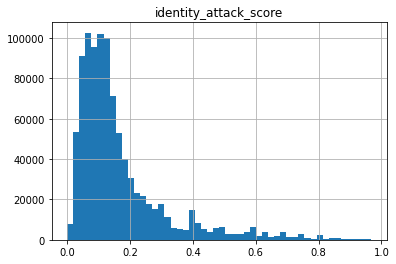

In [ ]:
joined_df[joined_df['identity_attack_score'] != -1.0].hist(column = 'identity_attack_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a929b5ad0>]],
      dtype=object)

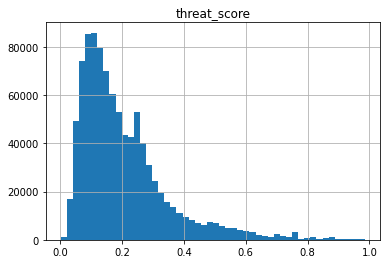

In [ ]:
joined_df[joined_df['threat_score'] != -1.0].hist(column = 'threat_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa3628e90>]],
      dtype=object)

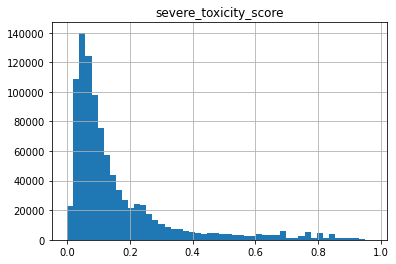

In [ ]:
joined_df[joined_df['severe_toxicity_score'] != -1.0].hist(column = 'severe_toxicity_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aa368b5d0>]],
      dtype=object)

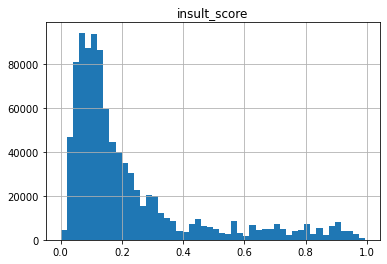

In [ ]:
joined_df[joined_df['insult_score'] != -1.0].hist(column = 'insult_score', bins=50)

In [ ]:
len_total = len(joined_df)
threshold = 0.9

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.9], joined_df[joined_df['threat_score'] > 0.9], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.9], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.9], how='outer', on='tweet_id')
len_90 = len(tmp)
print(f"Tweets with scores > 0.9: {len_90}, which is {(100 * (len_90 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.8], joined_df[joined_df['threat_score'] > 0.8], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.8], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.8], how='outer', on='tweet_id')
len_80 = len(tmp)
print(f"Tweets with scores > 0.8: {len_80}, which is {(100 * (len_80 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.7], joined_df[joined_df['threat_score'] > 0.7], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.7], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.7], how='outer', on='tweet_id')
len_70 = len(tmp)
print(f"Tweets with scores > 0.7: {len_70}, which is {(100 * (len_70 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.6], joined_df[joined_df['threat_score'] > 0.6], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.6], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.6], how='outer', on='tweet_id')
len_60 = len(tmp)
print(f"Tweets with scores > 0.6: {len_60}, which is {(100 * (len_60 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.5], joined_df[joined_df['threat_score'] > 0.5], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.5], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.5], how='outer', on='tweet_id')
len_50 = len(tmp)
print(f"Tweets with scores > 0.5: {len_50}, which is {(100 * (len_50 / len_total)):.2f}% of all tweets")

joined_df['persp_over_threshold'] = (joined_df['identity_attack_score'] > threshold) | (joined_df['threat_score'] > threshold) | (joined_df['severe_toxicity_score'] > threshold)
                                                                                 
del tmp


Tweets with scores > 0.9: 3772, which is 0.36% of all tweets
Tweets with scores > 0.8: 23370, which is 2.23% of all tweets
Tweets with scores > 0.7: 46141, which is 4.41% of all tweets
Tweets with scores > 0.6: 79231, which is 7.57% of all tweets
Tweets with scores > 0.5: 120594, which is 11.53% of all tweets


In [ ]:
# Maybe we don't need these cols and we can just calculate ad-hoc?
for player in list_of_players:
    joined_df[f'{player}_offensive'] = joined_df['persp_over_threshold'] & joined_df[player]

In [ ]:
player_offensive_tweet_map = pd.DataFrame(columns=["username",
                                                   "tweets_received",
                                                   "offensive_tweets_received",
                                                   "percentage_offensive"
                                                   ])

i = 0
for player in list_of_players:
    off_tweets = joined_df[player + '_offensive'].sum()
    tweets = joined_df[player].sum()
    percentage = 100 * (off_tweets / tweets)
    player_offensive_tweet_map.loc[i] = player, tweets, off_tweets, percentage
    i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning:

invalid value encountered in long_scalars



In [ ]:
player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=False, inplace=True)
offensive_tweets_all = joined_df['persp_over_threshold'].sum()
offensive_tweets_top_10 = player_offensive_tweet_map['offensive_tweets_received'].head(10).sum()
top_10_proportion = offensive_tweets_top_10 / offensive_tweets_all
print(f"Total offensive tweets: {offensive_tweets_all}")
print(f"Top 10 proportion: {top_10_proportion * 100}%")

print(player_offensive_tweet_map[['username', 'offensive_tweets_received']].head(10))

Total offensive tweets: 3772
Top 10 proportion: 89.47507953340403%
          username offensive_tweets_received
9   MarcusRashford                      1182
22    BukayoSaka87                       444
8        sterling7                       419
7            HKane                       412
81   AntoGriezmann                       247
14      Sanchooo10                       247
5     JackGrealish                       127
83         KMbappe                       125
13    OfficialTM_3                        95
6       JHenderson                        77


In [ ]:
# Saving a file for manual review, taken at threshold 90 - one-off ad-hoc task
# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == True].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/tweets_persp.csv", index=False)

# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == False].sample(1000).to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/inoffensive.csv", index=False)

In [ ]:
# Write to file in prep for regression
tweets_regression_file = root_path + "/regression_tweets.csv"
joined_df.to_csv(tweets_regression_file, index=False)

# Figures

In [ ]:
def create_frequency_plot(df, y_values):
    fig = go.Figure()
    for y_value in y_values:
        fig.add_trace(go.Scatter(x=df['created_at'], y=df[y_value],
                      mode='lines',
                      name=y_value))
    return fig

In [ ]:
INTERVAL = pd.offsets.Minute(60)

In [ ]:
# Plot all tweets frequency
df = joined_df.resample(INTERVAL, on='created_at')['tweet_id'].count().reset_index()
fig = create_frequency_plot(df, ['tweet_id'])
fig.show()

In [ ]:
# Plot Sterling, Rashford, Kane tweet frequency
df = joined_df.resample(INTERVAL, on='created_at')['MarcusRashford', 'sterling7', 'HKane'].sum().reset_index()
fig = create_frequency_plot(df, ['MarcusRashford', 'sterling7', 'HKane'])
fig.show()

In [ ]:
# Plot frequency of offensive tweets
df = joined_df.resample(INTERVAL, on='created_at')['persp_over_threshold'].sum().reset_index()
fig = create_frequency_plot(df, ['persp_over_threshold'])
fig.show()